###                            班级：2016级生物信息学                      姓名 ：严婧                      学号：3160129027

In [1]:
norm(x) = sqrt(x'*x)

norm (generic function with 1 method)

### 牛顿法

In [2]:
function newton(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        maxIterations=128,
        debug=false) 
    
    xk = x0
    fk = f(xk...)
    x1=[]
    h=h(xk...)
    for i in 1:maxIterations
        # iteration
        #d =-g(xk...)
        #α = d'*d/(d'*h*d)
        #δ = α*d
        xn = xk .- h^(-1)*g(xk...)
        
        fn = f(xn...)
        
        # convegence?
        if (abs(fn-fk)<=ϵf)
            println("Convergence is reached after ", i, " iterations.")
            x1=push!(x1,xn)
            return x1,i
        end
        x1=push!(x1,xk)     #把每一次的迭代点,以及函数值保存下来
        if debug
            println("i=",i," xk=", xk,)
        end
        xk = xn
        fk = fn
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
    #return N
    
end

newton (generic function with 1 method)

### 最速下降法

In [3]:
function search_for_alpha(f, xk, fk, d, g; α0=100, ϵ=0.5, τ=0.5)
    α = α0
    ϕ0= d'*g
    while f((xk .+ α*d)...) > fk + ϵ*α*ϕ0
        α = τ*α
    end
    return α 
end

search_for_alpha (generic function with 1 method)

In [4]:
function steepest_descent(f, g, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        maxIterations=128,
        debug=false) 

    xk = x0
    fk = f(xk...)
    x3=[]
    for i in 1:maxIterations

        d =-g(xk...)
        α = search_for_alpha(f, xk, fk, d, -d)
        δ = α*d
        xn = xk .+ δ
        fn = f(xn...)
        
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            x3=push!(x3,xn)
            return x3,i
        end
        x3=push!(x3,xk)     #把每一次的迭代点,以及函数值保存下来
        if debug
            println("i=",i, " α=", α, " xk=", xk, " d=", d, " δ= ",δ)
        end
        xk = xn
        fk = fn
    end
    println("WARN:", maxIterations, " iterations have been exceeded!")
end

steepest_descent (generic function with 1 method)

### 共轭梯度法

In [5]:
function ConjugateGradientFSO(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        debug=false)
    #check arguments
    n, m=size(h)
    if n≠m
        error("ERROR: Matrix H is not square!")
    end
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    dk = -gk
    dh = dk'*h*dk
    α =  -dk'*gk/dh
    δ =  α .*dk
    #xn = xk .+ δ
    #fn = f(xn...)
    #gn = g(xn...)
    if (norm(gk)<=ϵg)
        println("Convergence is reached after 1 iteration.")
        return x3,i
    end
    x3=[]
    for i in 1:maxIterations
        # iteration
        xn = xk .+ δ
        fn = f(xn...)
        gn = g(xn...)
        βn = dk'*h*gn/dh
        dn = -gn .+ βn.*dk
        dh = dn'*h*dn
        α  = -dn'*gn/dh
        δ  = α.*dn       
        # convegence?
        x3=push!(x3,xk)     #把每一次的迭代点,以及函数值保存下来
        if (norm(gn)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            x3=push!(x3,xn)
            return x3,i+1
        end
        xk = xn
        fk = fn
        dk = dn
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
    end
    #println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

### 牛顿法

In [6]:
iteration_points1,steps1=newton(
    (x,y)->x^2+(31/2)*y^2+3*x*y-x-27*y,
    (x,y)->[2*x+3*y-1,31*y+3*x-27],
    (x,y)->[2 3;3 31], 
    [1.,1.]; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        maxIterations=128,
        debug=false) 

Convergence is reached after 2 iterations.


(Any[[1.0, 1.0], [-0.943396, 0.962264]], 2)

### 最速下降法

In [7]:
iteration_points2,steps2=steepest_descent(
    (x,y)->x^2+(31/2)*y^2+3*x*y-x-27*y,
    (x,y)->[2*x+3*y-1,31*y+3*x-27],
    [1.,1.]; 
    ϵx=0.01, # precision for step size
    ϵf=0.01, 
    ϵg=0.01, 
    maxIterations=128,
    debug=false) 

Convergence is reached after 48 iterations.


(Any[[1.0, 1.0], [0.902344, 0.829102], [0.58086, 0.691486], [0.526266, 0.784781], [0.0561733, 0.998257], [0.00472999, 0.897806], [-0.161567, 0.815173], [-0.188969, 0.869234], [-0.309063, 0.929845], [-0.36626, 0.885997]  …  [-0.929542, 0.960515], [-0.931735, 0.961752], [-0.932799, 0.960819], [-0.934445, 0.962089], [-0.93487, 0.961566], [-0.936331, 0.961181], [-0.936862, 0.961785], [-0.937998, 0.961321], [-0.938387, 0.961958], [-0.939554, 0.962096]], 48)

### 共轭下降法

In [8]:
iteration_points3,steps3=ConjugateGradientFSO(
    (x,y)->x^2+(31/2)*y^2+3*x*y-x-27*y,
    (x,y)->[2*x+3*y-1,31*y+3*x-27],
    [2 3;3 31],
    [1.,1.],
    debug=true
)

i=1 x=[0.848749, 0.735311] α=0.4989840348330913 β=0.17203915720038307 gn=[2.90343, -1.6591] d=[-3.59159, 0.45483] δ= [-1.79215, 0.226953]
Convergence is reached after 2 iterations.


(Any[[1.0, 1.0], [0.848749, 0.735311], [-0.943396, 0.962264]], 3)

### 画图

In [9]:
using Gadfly

In [11]:
function draw(ff,    #ff为原函数，
        iteration_points1,iteration_points2,iteration_points3,
        #iteration_points1,iteration_points2,iteration_points3为三种方法的迭代点
        m1,m2,m3,    
        #m1,m2,m3为各方法的迭代点数量，设置这变量是以防某个方法的迭代次数过多，可自行选择绘制的点数
        a,b,c,d) #a,b为展示的坐标轴的横轴区间，c,d为展示的坐标轴的纵轴区间
    fit=layer(ff, a, b, c, d)        #画出原函数的横截面，以及展示区域
    scatter1=       #牛顿法
    layer(
        x=[iteration_points1[i][1] for i in 1:m1],        #输入点在横截面的横坐标
        y=[iteration_points1[i][2] for i in 1:m1],        #输入点在横截面的纵坐标
        label=[string(i) for i in 1:m1],
        Geom.point, Geom.line, Geom.label, Theme(default_color=colorant"blue")
    )
    scatter2=       #最速下降法
    layer(
        x=[iteration_points2[i][1] for i in 1:m2],        #输入点在横截面的横坐标
        y=[iteration_points2[i][2] for i in 1:m2],        #输入点在横截面的纵坐标
        label=[string(i) for i in 1:m2],
        Geom.point, Geom.line, Geom.label,Theme(default_color=colorant"red")
    )
    scatter3=       #共轭梯度法
    layer(
        x=[iteration_points3[i][1] for i in 1:m3],        #输入点在横截面的横坐标
        y=[iteration_points3[i][2] for i in 1:m3],        #输入点在横截面的纵坐标
        label=[string(i) for i in 1:m3],
        Geom.point, Geom.line, Geom.label,Theme(default_color=colorant"green")
    )
    return plot(fit,scatter1,scatter2,scatter3,Guide.manual_color_key("Method",["newton", "steepest descent"," conjugate gradient methods"],
            ["blue","red","green"]))
end

draw (generic function with 1 method)

In [12]:
[steps1
steps2
steps3
]

3-element Array{Int64,1}:
  2
 48
  3

In [13]:
[iteration_points1[2]
iteration_points2[48]
iteration_points3[3]]

6-element Array{Float64,1}:
 -0.9433962264150944
  0.9622641509433962
 -0.9395538938118302
  0.962095616405164 
 -0.9433962264150945
  0.9622641509433961

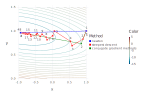

In [14]:
draw((x,y)->x^2+(31/2)*y^2+3*x*y-x-27*y,
    iteration_points1,
    iteration_points2,
    iteration_points3,
    steps1,
    steps2,
    steps3,
    1,
    -1,
    1.5,
    0
)